In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt

In [11]:
def load_data(filename):
    data = np.load(filename)
    return data['arr_1'], data['arr_2'], data['arr_3']

def make_plot(filename):
    BL_zero, Delta_zero, Q_zero = load_data(filename + '.npz')
    BL_one, Delta_one, Q_one = load_data(filename + '_one.npz')
    BL_two, Delta_two, Q_two = load_data(filename + '_two.npz')
    BL_three, Delta_three, Q_three = load_data(filename + '_three.npz')

    data_plt_bl = np.row_stack((BL_zero[0, :], BL_one[0, :], BL_two[0, :], BL_three[0, :]))
    data_plt_zero = np.column_stack((Delta_zero[:, 0], Delta_zero[:, 1], Q_zero[:, 0], Q_zero[:, 1]))
    data_plt_one = np.column_stack((Delta_one[:, 0], Delta_one[:, 1], Q_one[:, 0], Q_one[:, 1]))
    data_plt_two = np.column_stack((Delta_two[:, 0], Delta_two[:, 1], Q_two[:, 0], Q_two[:, 1]))
    data_plt_three = np.column_stack((Delta_three[:, 0], Delta_three[:, 1], Q_three[:, 0], Q_three[:, 1]))

    Delta_vs_Q(filename, data_plt_bl, data_plt_zero, data_plt_one, data_plt_two, data_plt_three)

def Delta_vs_Q(filename, data_plt_bl, data_plt_zero, data_plt_one, data_plt_two, data_plt_three):
    
    labels = ['p=0', 'p=0.1', 'p=0.2', 'p=0.3']
    
    f = plt.figure(figsize=(10,10))
       
    plt.plot(data_plt_zero[:,2], data_plt_zero[:,0], ':o', color='magenta', linewidth=4, label=labels[0])
    #plt.fill_between(data_plt_zero[:,2], data_plt_zero[:,0]-data_plt_zero[:,1]/2, data_plt_zero[:,0]+data_plt_zero[:,1]/2, facecolor='magenta', alpha=0.5)
    plt.plot(data_plt_bl[0,1], data_plt_bl[0,0], 'mo', markersize=15, markerfacecolor='None', markeredgewidth=3)

    plt.plot(data_plt_one[:, 2], data_plt_one[:, 0], '--', color='blue', linewidth=4, label=labels[1])
    #plt.fill_between(data_plt_one[:, 2], data_plt_one[:, 0]-data_plt_one[:, 1]/2, data_plt_one[:, 0]+data_plt_one[:, 1]/2, facecolor='blue', alpha=0.5)
    plt.plot(data_plt_bl[1,1], data_plt_bl[1,0], 'bo', markersize=15, markerfacecolor='None', markeredgewidth=3)

    plt.plot(data_plt_two[:, 2], data_plt_two[:, 0], '-.', color='green', linewidth=4, label=labels[2])
    #plt.fill_between(data_plt_two[:, 2], data_plt_two[:, 0]-data_plt_two[:, 1]/2, data_plt_two[:, 0]+data_plt_two[:, 1]/2, facecolor='green', alpha=0.5)
    plt.plot(data_plt_bl[2,1], data_plt_bl[2,0], 'go', markersize=15, markerfacecolor='None', markeredgewidth=3)

    plt.plot(data_plt_three[:,2], data_plt_three[:,0], ':', color='red', linewidth=4, label=labels[3])
    #plt.fill_between(data_plt_three[:,2], data_plt_three[:,0]-data_plt_three[:,1]/2, data_plt_three[:,0]+data_plt_three[:,1]/2, facecolor='red', alpha=0.5)
    plt.plot(data_plt_bl[3,1], data_plt_bl[3,0], 'ro', markersize=15, markerfacecolor='None', markeredgewidth=3)
    
    plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    plt.ylabel(r'\textbf{Clustering Cost}', fontsize=33)
    plt.xlabel(r'\textbf{Number of Queries}', fontsize=33)
    plt.grid()
    plt.legend()
    
    #plt.rcParams['figure.figsize'] = [10, 10]
    
    # use LaTeX fonts in the plot
    plt.rcParams.update({'font.size': 33})
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.show()
    
    f.savefig('Fig/' + filename + "2.pdf", bbox_inches='tight')
    
    print('p = 0. Q_KC = ', data_plt_bl[0,1])
    print('p = 0.1. KC cost = ', data_plt_bl[1,0], 'Q_KC = ', data_plt_bl[1,1])
    print('p = 0.2. KC cost = ', data_plt_bl[2,0], 'Q_KC = ', data_plt_bl[2,1])
    print('p = 0.3. KC cost = ', data_plt_bl[3,0], 'Q_KC = ', data_plt_bl[3,1])

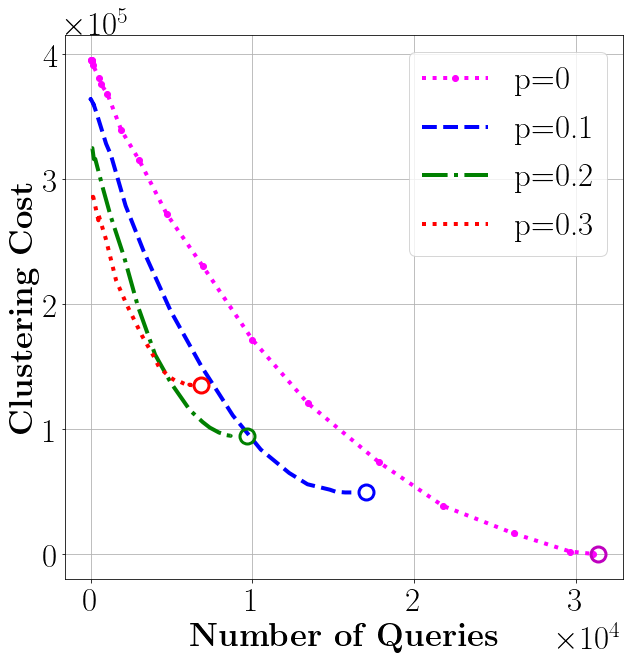

p = 0. Q_KC =  31374.0
p = 0.1. KC cost =  49678.28 Q_KC =  17004.98
p = 0.2. KC cost =  94383.34 Q_KC =  9671.44
p = 0.3. KC cost =  135203.72 Q_KC =  6853.14


In [13]:
make_plot('skew')